# Split and Analyze 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/media/gjperin/64gb1/"
csv = pd.read_csv(DATA_PATH + "clf_90_5_5.csv")


In [65]:
def plot_data(data):    
    # Adaptado de https://github.com/marixko/MNRAS_nakazono_2021/blob/main/Nakazono_et_al_2021.ipynb

    blue = (0, 0.48, 0.70)
    orange = (230/255,159/255, 0)
    yellow = (0.64, 0.59, 0.15)
    pink = (0.8, 0.47, 0.65)
    black = (0,0,0)

    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(1,3, figsize=(15,7))

    bins = np.arange(12,22.1,1)
    log = True
    density = False
    ax[0].hist(data[(data.target==0) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=pink, log=log, density=density, label="Train", zorder=3)
    ax[0].hist(data[(data.target==0) & (data.validation==1)].r_iso, bins=bins, color=pink, log=log, density=density, label="Validation", zorder=3)
    ax[0].hist(data[(data.target==0) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)

    ax[1].hist(data[(data.target==1) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=blue, log=log, density=density, label="Train", zorder=3)
    ax[1].hist(data[(data.target==1) & (data.validation==1)].r_iso, bins=bins, color=blue, log=log, density=density, label="Validation", zorder=3)
    ax[1].hist(data[(data.target==1) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)


    ax[2].hist(data[(data.target==2) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=yellow, log=log, density=density, label="Train", zorder=3)
    ax[2].hist(data[(data.target==2)& (data.validation==1)].r_iso, bins=bins, color=yellow, log=log, density=density, label="Validation", zorder=3)
    ax[2].hist(data[(data.target==2) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)



    for j in [0,1,2]:
        if j == 0:
            title="QSO"
        elif j == 1:
            title="STAR"
        else:
            title ="GALAXY"
        
        ax[j].minorticks_on()
        ax[j].grid(zorder=0)
        ax[j].set_xticks(np.arange(12,22.1,2))
        ax[j].legend(loc="upper left", title=title, prop={'size': 15}, title_fontsize=18)
            
    plt.setp(ax, xlim=(12,22), ylim=(0.1,1000000) ,xlabel='r', ylabel = "Frequency")
    plt.tight_layout()

In [60]:
nowise = csv[csv['w1mpro'].isna()]
dist1 = csv.dropna().sort_values("r_iso").iloc[0:25000]
dist2 = csv.dropna().sort_values("r_iso").iloc[25000:50000]
dist3 = csv.dropna().sort_values("r_iso").iloc[50000:75000]
dist4 = csv.dropna().sort_values("r_iso").iloc[75000:]

In [54]:
nowise["target"][nowise.split == "val"].value_counts()/len(nowise["target"][nowise.split == "val"]) * 100

1    52.121212
2    23.982684
0    23.896104
Name: target, dtype: float64

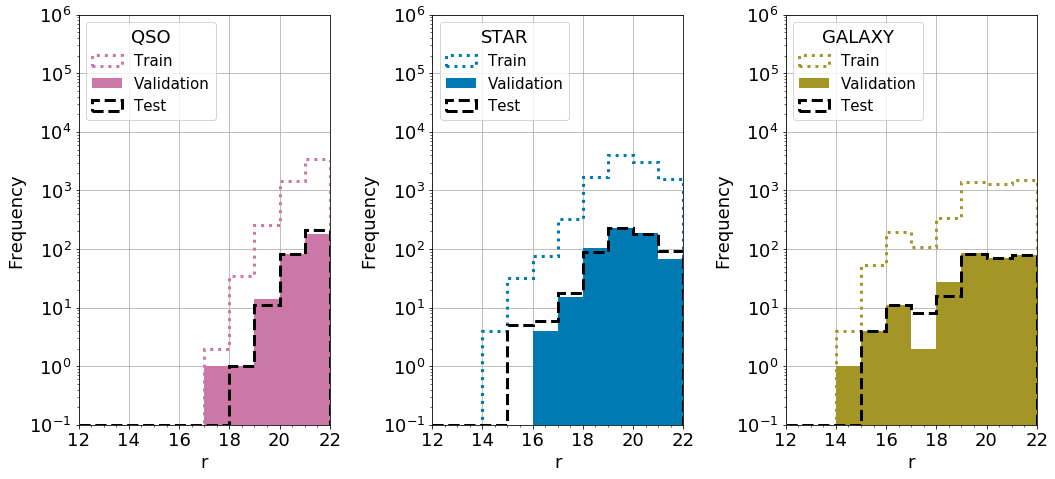

In [70]:
plot_data(nowise)